# Sentiment Analysis - solutions


In [3]:
import pandas as pd

yelp = pd.read_csv('./yelp_reviews.csv')
yelp.head()

,review_id,text,stars
0,fWKvX83p0-ka4JS3dc6E5A,My wife took me here on my birthday for breakf...,5
1,IjZ33sJrzXqU-0X6U8NwyA,I have no idea why some people give bad review...,5
2,G-WvGaISbqqaMHlNnByodA,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
3,1uJFq2r5QfJG_6ExMRCaGw,General Manager Scott Petello is a good egg!!!...,5
4,riFQ3vxNpP4rWLk_CSri2A,Drop what you're doing and drive here. After I...,5


Pre-process the data

In [5]:
from wordcloud import WordCloud

# lowercase everything
yelp["text_cleaned"] = yelp["text"].str.lower()

import re

# we use something called "regular expressions"
# with which we can create a pattern that says "replace anything that ISN'T text or spaces with an empty string"
# thus removing all non-text characters

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# call this function on all text values
yelp["text_cleaned"] = yelp["text_cleaned"].apply(remove_punctuation)

stopwords = []

with open("./stopwords.txt", "r") as f:
     stopwords = [w.replace("\n", "") for w in f.readlines()]

def remove_stopwords(text):
    # get a list of words
    words = text.split()
    
    # loop through and add non-stopword words to a new list
    words_cleaned = []
    for word in words:
        if word not in stopwords:
            words_cleaned.append(word)
            
    # return the new words as a single string
    return " ".join(words_cleaned)

# apply the function to the text
yelp["text_cleaned"] = yelp["text_cleaned"].apply(remove_stopwords)

Prepare positive reviews

In [6]:
positive_reviews = yelp[yelp["stars"] == 5]

all_positive_reviews = " ".join(review for review in positive_reviews["text"])

# <font color="red">Exercise: word clouds</font>

Your task is now to create a word cloud for **negative reviews only**.

Try some of the options in the WordCloud object (the documentation is here: [WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)) to change colours, font sizes, or anything else!

Change the two word clouds (the one for positive reviews and the one for negative reviews) to be visually different and signify the positive/negative aspect more clearly.

In [7]:
import matplotlib.pyplot as plt

negative_reviews = yelp[yelp["stars"] == 1]
all_negative_reviews = " ".join(review for review in negative_reviews["text_cleaned"])
print("{0} total words in {1} negative reviews".format(len(all_negative_reviews), len(negative_reviews)))

378998 total words in 749 negative reviews


We can use the colormap parameter to limit to "positive" and "negative" colors

More options here: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

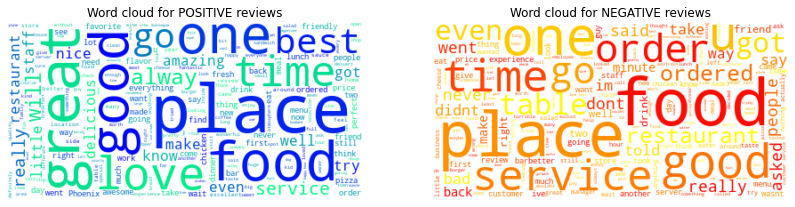

In [8]:
positive_word_cloud = WordCloud(background_color="white", colormap="winter").generate(all_positive_reviews)
negative_word_cloud = WordCloud(background_color="white", colormap="autumn").generate(all_negative_reviews)

# show both with matplotlib
fig, axes = plt.subplots(1, 2, figsize=(14, 8)) # create two sets of axes to plot on

axes[0].imshow(positive_word_cloud, interpolation='bilinear')
axes[1].imshow(negative_word_cloud, interpolation='bilinear')

axes[0].set_title("Word cloud for POSITIVE reviews")
axes[1].set_title("Word cloud for NEGATIVE reviews")

axes[0].axis("off")
axes[1].axis("off")

plt.show()

# <font color='red'> Exercise: Text classification with TextBlob</font>

Now use TextBlob to classify your reviews into positive, negative or neutral sentiments.

Create a new column called `sentiment` which is populated as follows.

For each document in your dataset:
- compute the sentiment polarity score using TextBlob
- if this score is < -0.4 classify it as "negative"
- if it's over 0.4 classify it as "positive"
- everything else should be "neutral"

***Hint: it's probably easiest if you write a function that can classify a single document, and then `apply` it to your DataFrame column!***

In [13]:
 from textblob import TextBlob

In [14]:
from textblob import TextBlob

def classify(document):
    blob = TextBlob(document)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score < -0.4:
        return "negative"
    elif sentiment_score > 0.4:
        return "positive"
    else:
        return "neutral"

yelp["sentiment"] = yelp["text_cleaned"].apply(classify)
yelp.head()

,review_id,text,stars,text_cleaned,sentiment
0,fWKvX83p0-ka4JS3dc6E5A,My wife took me here on my birthday for breakf...,5,wife took birthday breakfast excellent weather...,positive
1,IjZ33sJrzXqU-0X6U8NwyA,I have no idea why some people give bad review...,5,idea people give bad reviews place goes show p...,neutral
2,G-WvGaISbqqaMHlNnByodA,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,rosie dakota love chaparral dog park convenien...,positive
3,1uJFq2r5QfJG_6ExMRCaGw,General Manager Scott Petello is a good egg!!!...,5,general manager scott petello good egg go deta...,neutral
4,riFQ3vxNpP4rWLk_CSri2A,Drop what you're doing and drive here. After I...,5,drop youre drive ate go back next day food goo...,neutral


#### Now run the code below to tabulate your sentiment labels with the star ratings:

In [15]:
pd.crosstab(yelp["sentiment"],
            yelp["stars"])

stars,1,5
sentiment,,
negative,33,6
neutral,703,2302
positive,13,1029


#### What does this tell you about your classifier?

The positive label was used mostly for 5 star reviews but a lot of neutral labels were applied. Lowering the threshold from 0.4 would likely shift a lot of these neutral reviews to be positive/negative. In reality, the better approach is to keep a "neutral" category for reviews that don't convey strong emotion.

In [17]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial

TextBlob("Textblob is amazingly simple to use. What great fun!")

In [18]:
testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)